In [1]:
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from IPython import display 
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u
from astropy.io import ascii
import fitsio
from scipy import spatial
from tqdm import trange

In [2]:
clumper = Table.read("DESI_clusters_final_2023_full.fits").to_pandas()

In [4]:
clumper_members_north = Table.read("north_members_final_2023.fits").to_pandas()

In [5]:
clumper_members_south = Table.read("south_members_final_2023.fits").to_pandas()

In [6]:
clumper_members_south.head()

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
0,14220600027461330,14220600027461330,11.592875,0.727876,0.727876,0.022810,1.0
1,34113940028551976,34113940028551976,11.262046,0.835756,0.835756,0.041270,1.0
2,19735530026170372,19735530026170372,11.371797,0.627709,0.627709,0.028379,1.0
3,68222210027178808,68222210027178808,11.497631,0.688895,0.688895,0.021893,1.0
4,91721810027257280,91721810027257280,11.847974,0.273392,0.273392,0.011761,1.0


In [7]:
clumper.head()

,RA_central,DEC_central,z_median_central,z_average_no_wt,z_average_prob,z_average_mass_prob,z_std_central,z_stde_no_wt,z_stde_prob,z_stde_mass_prob,...,correction_factor,neighbors_onempc,neighbors_halfmpc,neighbors_tenthmpc,richness_onempc,richness_halfmpc,richness_tenthmpc,flag_foreground,edge_mask,footprint_flag
0,193.849401,34.456471,0.620361,0.612266,0.616049,0.616323,0.024668,0.010973,0.007319,0.007251,...,1.684676,60.033333,30.900000,6.200000,50.947763,58.034536,60.033333,0,1.0,0
1,199.613594,34.359489,0.412146,0.378484,0.380455,0.380630,0.010519,0.007628,0.006238,0.006224,...,1.368414,94.233333,33.233333,3.700000,74.452290,89.422604,94.233333,0,1.0,0
2,197.302646,34.909643,0.320092,0.344044,0.333670,0.334049,0.012730,0.007319,0.006134,0.006096,...,1.263699,88.066667,37.466667,2.000000,63.320826,82.068207,88.066667,0,1.0,0
3,196.113499,33.587028,0.187818,0.244615,0.213247,0.213212,0.004308,0.006309,0.003518,0.003497,...,1.142098,143.700000,67.866667,8.300000,116.112704,137.037568,143.700000,0,1.0,0
4,197.896391,32.482776,0.611117,0.631119,0.646819,0.647613,0.024086,0.017511,0.011208,0.011049,...,1.667831,33.466667,16.533333,3.733333,24.144604,31.289016,33.466667,0,1.0,0


In [8]:
sclumper = clumper.sort_values("cluster_mass_onempc", ascending = False)

In [9]:
sclumper.head(1).gid.values[0]

2.6291637501128663e+18

In [10]:
sclumper.head(1).gid.values[0]

2.6291637501128663e+18

In [11]:
sclumper.head(2).iloc[0].T

RA_central               2.629164e+02
DEC_central              2.286627e+01
z_median_central         4.041877e-01
z_average_no_wt          4.075543e-01
z_average_prob           4.074124e-01
z_average_mass_prob      4.076421e-01
z_std_central            1.841393e-02
z_stde_no_wt             3.635117e-03
z_stde_prob              2.841155e-03
z_stde_mass_prob         2.827299e-03
RELEASE                  9.010000e+03
BRICKID                  4.591590e+05
OBJID                    3.783000e+03
MASKBITS                 0.000000e+00
gid                      2.629164e+18
mass_central             1.231602e+01
cluster_mass_onempc      1.345489e+01
cluster_mass_halfmpc     1.315034e+01
cluster_mass_tenthmpc    1.279182e+01
mass_bkgd_onempc         1.187210e+01
mass_bkgd_halfmpc        1.112919e+01
mass_bkgd_tenthmpc      -5.000000e+01
correction_factor        1.358624e+00
neighbors_onempc         2.348667e+02
neighbors_halfmpc        9.110000e+01
neighbors_tenthmpc       9.500000e+00
richness_one

In [12]:
sclumper[np.logical_and.reduce((sclumper.RA_central >262.8, sclumper.RA_central <263.1, sclumper.DEC_central >22.8, sclumper.DEC_central <23.0))]#.iloc[-1].gid

,RA_central,DEC_central,z_median_central,z_average_no_wt,z_average_prob,z_average_mass_prob,z_std_central,z_stde_no_wt,z_stde_prob,z_stde_mass_prob,...,correction_factor,neighbors_onempc,neighbors_halfmpc,neighbors_tenthmpc,richness_onempc,richness_halfmpc,richness_tenthmpc,flag_foreground,edge_mask,footprint_flag
103871,262.916375,22.866265,0.404188,0.407554,0.407412,0.407642,0.018414,0.003635,0.002841,0.002827,...,1.358624,234.866667,91.1,9.500000,216.190434,230.670939,234.866667,0,1.0,0
103936,263.018875,22.930024,0.371579,0.418207,0.407086,0.407112,0.010059,0.007729,0.005761,0.005761,...,1.320010,69.433333,17.5,3.433333,49.446516,64.842114,69.433333,0,1.0,0
104386,262.924035,22.874362,0.956994,0.796367,0.879459,0.880564,0.135013,0.047099,0.023552,0.022864,...,2.558541,8.400000,4.5,2.800000,6.913292,8.378323,8.400000,0,1.0,0


In [142]:
sclumper[np.logical_and.reduce((sclumper.RA_central >262.8, sclumper.RA_central <263.1, sclumper.DEC_central >22.8, sclumper.DEC_central <23.0))].iloc[1].gid

2.63018875011293e+18

In [73]:
clumper_members_south[np.isclose(clumper_members_south.cluster, sclumper[np.logical_and.reduce((sclumper.RA_central >262.8, sclumper.RA_central <263.0, sclumper.DEC_central >22.8, sclumper.DEC_central <23.0))].iloc[0].gid, rtol = 1e-10)]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
2493025,2629163750112866304,2629163750112866304,12.316016,0.404188,0.404188,0.018414,1.000000
2493571,2628775770112875520,2629163750112866304,10.729384,0.403981,0.404188,0.033669,0.995108
2493826,2629044940112915968,2629163750112866304,10.479012,0.403627,0.404188,0.061509,0.992726
2494718,2629514170112828416,2629163750112866304,11.032234,0.406059,0.404188,0.025931,0.942467
2494896,2629520230112853504,2629163750112866304,10.583040,0.402058,0.404188,0.050455,0.966329
2499759,2629144140112818688,2629163750112866304,11.010895,0.416342,0.404188,0.039016,0.755413
2507923,2629094080112818176,2629163750112866304,10.680506,0.444166,0.404188,0.047831,0.403254


In [14]:
clumper_members_south[np.isclose(clumper_members_south.cluster, sclumper.head(5).iloc[0].gid, rtol = 1e-10)]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
2493025,2629163750112866304,2629163750112866304,12.316016,0.404188,0.404188,0.018414,1.000000
2493571,2628775770112875520,2629163750112866304,10.729384,0.403981,0.404188,0.033669,0.995108
2493826,2629044940112915968,2629163750112866304,10.479012,0.403627,0.404188,0.061509,0.992726
2494718,2629514170112828416,2629163750112866304,11.032234,0.406059,0.404188,0.025931,0.942467
2494896,2629520230112853504,2629163750112866304,10.583040,0.402058,0.404188,0.050455,0.966329
2499759,2629144140112818688,2629163750112866304,11.010895,0.416342,0.404188,0.039016,0.755413
2507923,2629094080112818176,2629163750112866304,10.680506,0.444166,0.404188,0.047831,0.403254


In [15]:
np.round(2629163750112866304 / 10**16, 6)

262.916375

In [16]:
np.round(112866304 / 10**6, 6) - 90

22.866304

In [116]:
clumper["count_neighbors"] = np.zeros(len(clumper))

In [16]:
clumper = clumper.sample(n = 1000)
clumper.reset_index(inplace = True)

In [17]:
for i in trange(len(clumper), position = 0, leave = True):
    if len(clumper_members_south[np.isclose(clumper_members_south.cluster, clumper.iloc[i].gid, rtol = 1e-8)]) > 0:
        clumper.at[i, "count_neighbors"] = len(clumper_members_south[np.isclose(clumper_members_south.cluster, clumper.iloc[i].gid, rtol = 1e-8)])
        #clumper.at[i, "count_neighbors"] = np.sum(clumper_members_south[np.isclose(clumper_members_south.cluster, clumper.iloc[i].gid, rtol = 1e-10)].prob)
    else:
        if len(clumper_members_north[np.isclose(clumper_members_north.cluster, clumper.iloc[i].gid, rtol = 1e-8)]) > len(clumper_members_south[np.isclose(clumper_members_south.cluster, clumper.iloc[i].gid, rtol = 1e-8)]):
            clumper.at[i, "count_neighbors"] = len(clumper_members_north[np.isclose(clumper_members_north.cluster, clumper.iloc[i].gid, rtol = 1e-8)])
            #clumper.at[i, "count_neighbors"] = np.sum(clumper_members_north[np.isclose(clumper_members_north.cluster, clumper.iloc[i].gid, rtol = 1e-10)].prob)
        else:
            print(clumper.iloc[i].gid)

100%|██████████| 1000/1000 [01:35<00:00, 10.46it/s]


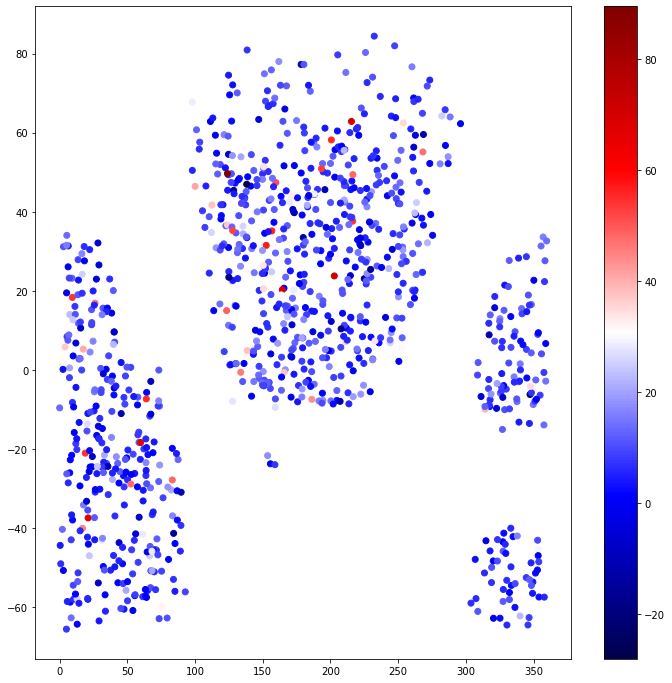

In [18]:
plt.figure(figsize = (12,12))
plt.scatter(clumper.RA_central, clumper.DEC_central, c = (clumper.count_neighbors - clumper.neighbors_onempc), cmap = "seismic")
plt.colorbar()
plt.show()

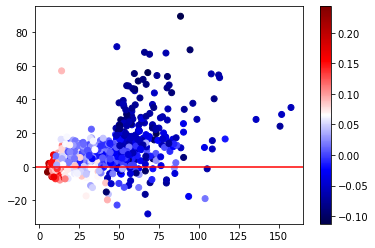

In [30]:
plt.scatter(clumper.neighbors_onempc, clumper.count_neighbors - clumper.neighbors_onempc, c = clumper.z_median_central - clumper.z_average_no_wt, cmap = "seismic")
plt.axhline(0, color = "red")
plt.colorbar()

In [31]:
clumper[clumper.count_neighbors - clumper.neighbors_onempc > 80].iloc[0]

index                    5.284600e+04
RA_central               1.239786e+02
DEC_central              4.966941e+01
z_median_central         1.093767e-01
z_average_no_wt          2.220570e-01
z_average_prob           1.681690e-01
z_average_mass_prob      1.684300e-01
z_std_central            8.276436e-03
z_stde_no_wt             6.439944e-03
z_stde_prob              4.961623e-03
z_stde_mass_prob         4.940672e-03
RELEASE                  9.011000e+03
BRICKID                  5.832750e+05
OBJID                    3.393000e+03
MASKBITS                 0.000000e+00
gid                      1.239786e+18
mass_central             1.135804e+01
cluster_mass_onempc      1.240413e+01
cluster_mass_halfmpc     1.199450e+01
cluster_mass_tenthmpc    1.169391e+01
mass_bkgd_onempc         1.172684e+01
mass_bkgd_halfmpc        1.104336e+01
mass_bkgd_tenthmpc      -5.000000e+01
correction_factor        1.083538e+00
neighbors_onempc         8.853333e+01
neighbors_halfmpc        2.270000e+01
neighbors_te

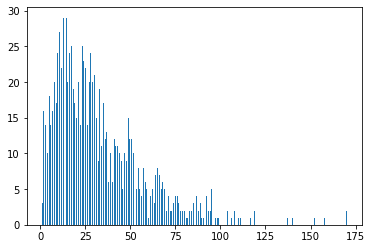

In [70]:
plt.hist(clumper.count_neighbors, bins = 300);

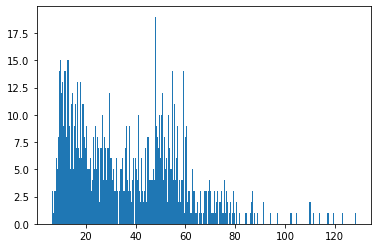

In [72]:
plt.hist(clumper.neighbors_onempc, bins = 300);

In [50]:
clumper[clumper.gid == 1.6713823001075548e+18].T

,96855
RA_central,1.671382e+02
DEC_central,1.755483e+01
z_median_central,8.623402e-01
z_average_no_wt,7.549745e-01
z_average_prob,8.161253e-01
z_average_mass_prob,8.181060e-01
z_std_central,5.101553e-02
z_std_no_wt,1.461067e-01
z_std_prob,8.855030e-02
z_std_mass_prob,8.757785e-02


In [75]:
clumper_members_south[np.isclose(clumper_members_south.cluster, 1.6713823001075548e+18, rtol = 1e-10)]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
12143222,1671382300107554816,1671382300107554816,11.247796,0.862340,0.86234,0.051016,1.000000
12152343,1671393390107572480,1671382300107554816,11.606849,0.851791,0.86234,0.035175,0.764251
12162566,1671403180107552256,1671382300107554816,11.166179,0.830172,0.86234,0.063729,0.613727
12163022,1671627320107537664,1671382300107554816,10.549672,0.828902,0.86234,0.078915,0.671763
12173612,1671452020107553280,1671382300107554816,10.816449,0.934252,0.86234,0.168021,0.668655
12174719,1671516380107566592,1671382300107554816,10.866754,0.784862,0.86234,0.046845,0.098143
12174969,1671236920107545088,1671382300107554816,11.640715,0.941011,0.86234,0.144866,0.587089
12175229,1671189370107546368,1671382300107554816,11.217863,0.782500,0.86234,0.046732,0.087552
12177594,1671530260107527680,1671382300107554816,11.176292,0.954784,0.86234,0.099211,0.351443
12179856,1671607430107544832,1671382300107554816,10.662961,0.755720,0.86234,0.082977,0.198812


In [98]:
clumper_members_south[np.isclose(clumper_members_south.cluster, 2.570635730111188e+18, rtol = 1e-7)]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
417772,2570635730111187968,2570635730111187968,11.900109,0.212302,0.212302,0.017007,1.000000
418015,2570497980111190528,2570635730111187968,10.956560,0.212344,0.212302,0.009615,0.996524
418042,2571126810111161856,2570635730111187968,10.647660,0.212391,0.212302,0.024487,0.997089
418968,2570258040111141888,2570635730111187968,10.848172,0.213748,0.212302,0.009020,0.872600
419072,2570063780111219200,2570635730111187968,10.378687,0.213931,0.212302,0.027370,0.952541
419304,2570452170111186944,2570635730111187968,10.857395,0.214306,0.212302,0.011849,0.865713
420811,2569825710111176192,2570635730111187968,10.622034,0.207524,0.212302,0.034776,0.890724


In [107]:
clumper_members_south[clumper_members_south.cluster == 2.570635730111188e+18]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
417772,2570635730111187968,2570635730111187968,11.900109,0.212302,0.212302,0.017007,1.000000
418015,2570497980111190528,2570635730111187968,10.956560,0.212344,0.212302,0.009615,0.996524
418042,2571126810111161856,2570635730111187968,10.647660,0.212391,0.212302,0.024487,0.997089
418968,2570258040111141888,2570635730111187968,10.848172,0.213748,0.212302,0.009020,0.872600
419072,2570063780111219200,2570635730111187968,10.378687,0.213931,0.212302,0.027370,0.952541
419304,2570452170111186944,2570635730111187968,10.857395,0.214306,0.212302,0.011849,0.865713
420811,2569825710111176192,2570635730111187968,10.622034,0.207524,0.212302,0.034776,0.890724


In [ ]:
257.0636 21.18820

In [109]:
sclumper[np.logical_and.reduce((sclumper.RA_central >256.9, sclumper.RA_central <257.2, sclumper.DEC_central >21.1, sclumper.DEC_central <21.3))].T

,213928,213986,214318,214301
RA_central,2.570636e+02,2.569191e+02,2.569590e+02,2.570360e+02
DEC_central,2.118820e+01,2.116916e+01,2.120677e+01,2.113385e+01
z_median_central,2.123017e-01,2.951451e-01,4.277951e-01,3.392395e-01
z_average_no_wt,2.765239e-01,3.442343e-01,3.832013e-01,3.336534e-01
z_average_prob,2.403439e-01,3.198099e-01,3.959075e-01,3.129436e-01
z_average_mass_prob,2.400623e-01,3.202378e-01,3.967968e-01,3.128356e-01
z_std_central,1.700684e-02,1.225166e-02,2.431009e-02,3.524580e-02
z_std_no_wt,8.099047e-02,9.817089e-02,1.078881e-01,1.071047e-01
z_std_prob,5.223693e-02,6.997727e-02,7.430343e-02,7.696543e-02
z_std_mass_prob,5.180505e-02,6.907515e-02,7.439677e-02,7.740639e-02


In [106]:
clumper_members_south[clumper_members_south.cluster == 2.5703595501111337e+18]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
417630,2570359550111133696,2570359550111133696,11.315195,0.339240,0.33924,0.035246,1.000000
418567,2570203070111151616,2570359550111133696,9.859703,0.338391,0.33924,0.080735,0.991617
418580,2570513480111110144,2570359550111133696,9.972013,0.340107,0.33924,0.161750,0.995723
419465,2569843670111162880,2570359550111133696,10.565065,0.336955,0.33924,0.061653,0.970441
420335,2570554250111102976,2570359550111133696,10.379843,0.343135,0.33924,0.046809,0.933684
420906,2570510450111170048,2570359550111133696,10.087100,0.334314,0.33924,0.054636,0.928170
420956,2570777670111128064,2570359550111133696,10.668403,0.334218,0.33924,0.041315,0.903259
422797,2570877270111148544,2570359550111133696,10.134474,0.348153,0.33924,0.100685,0.929454
422884,2570701610111176192,2570359550111133696,10.475806,0.330111,0.33924,0.114984,0.936725
424520,2570812280111134208,2570359550111133696,10.504914,0.352567,0.33924,0.070052,0.849115


In [152]:
sclumper[np.logical_and.reduce((sclumper.RA_central >262.8, sclumper.RA_central <263.1, sclumper.DEC_central >22.8, sclumper.DEC_central <23.0))].iloc[0].T

RA_central               2.629164e+02
DEC_central              2.286627e+01
z_median_central         4.041877e-01
z_average_no_wt          4.077711e-01
z_average_prob           4.074302e-01
z_average_mass_prob      4.076582e-01
z_std_central            1.841393e-02
z_std_no_wt              5.493496e-02
z_std_prob               4.455456e-02
z_std_mass_prob          4.422691e-02
RELEASE                  9.010000e+03
BRICKID                  4.591590e+05
OBJID                    3.783000e+03
MASKBITS                 0.000000e+00
gid                      2.629164e+18
mass_central             1.231602e+01
cluster_mass_onempc      1.345460e+01
cluster_mass_halfmpc     1.315036e+01
cluster_mass_tenthmpc    1.279041e+01
mass_bkgd_onempc         1.187210e+01
mass_bkgd_halfmpc        1.112919e+01
mass_bkgd_tenthmpc      -5.000000e+01
correction_factor        1.358624e+00
neighbors_onempc         2.333667e+02
neighbors_halfmpc        9.026667e+01
neighbors_tenthmpc       9.166667e+00
richness_one

In [15]:
clumper_members_south[clumper_members_south.cluster == sclumper[np.logical_and.reduce((sclumper.RA_central >262.8, sclumper.RA_central <263.1, sclumper.DEC_central >22.8, sclumper.DEC_central <23.0))].iloc[0].gid]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
4963516,2629163750112866304,2629163750112866304,12.316016,0.404188,0.404188,0.018414,1.000000
4963724,2628775770112875520,2629163750112866304,10.729384,0.403981,0.404188,0.033669,0.995108
4963734,2629031850112878592,2629163750112866304,11.337486,0.404427,0.404188,0.064650,0.997044
4963836,2629044940112915968,2629163750112866304,10.479012,0.403627,0.404188,0.061509,0.992726
4963867,2628930000112875520,2629163750112866304,10.440349,0.404819,0.404188,0.049097,0.989747
...,...,...,...,...,...,...,...
4986727,2629244250112816128,2629163750112866304,9.953053,0.257659,0.404188,0.070368,0.037313
4986894,2628630620112878080,2629163750112866304,11.198934,0.554413,0.404188,0.068102,0.027392
4986898,2629304420112842752,2629163750112866304,9.580209,0.253916,0.404188,0.085345,0.078280
4986983,2629228250112830464,2629163750112866304,9.661582,0.252371,0.404188,0.065450,0.020363


In [26]:
clumper_members_north[clumper_members_north.cluster == clumper[clumper.count_neighbors - clumper.neighbors_onempc > 80].iloc[0].gid]

,galaxy,cluster,galaxy_mass,galaxy_z,cluster_z,galaxy_z_std,prob
1676331,1239786280139669504,1239786280139669504,11.358035,0.109377,0.109377,0.008276,1.000000
1676462,1238525120139608576,1239786280139669504,11.053365,0.109412,0.109377,0.009466,0.997058
1676470,1239422900139596800,1239786280139669504,10.290914,0.109440,0.109377,0.024005,0.997908
1677096,1238152840139589888,1239786280139669504,10.239968,0.111404,0.109377,0.025596,0.936876
1677235,1239424300139745536,1239786280139669504,11.105436,0.111845,0.109377,0.013679,0.856806
...,...,...,...,...,...,...,...
1703595,1238586000139568640,1239786280139669504,9.983149,0.509592,0.109377,0.169359,0.018122
1703605,1239079250139728896,1239786280139669504,10.348188,0.512194,0.109377,0.136355,0.003135
1703620,1241024380139663616,1239786280139669504,10.132455,0.516062,0.109377,0.167420,0.015135
1703735,1239036140139574528,1239786280139669504,10.686625,0.563299,0.109377,0.178342,0.010920


In [ ]:
257.0539, 21.1848

In [139]:
np.sum(np.abs(np.random.normal(size = 100)))**2/np.sum(np.random.normal(size = 100)**2)

83.46689991741965

In [140]:
np.sum(np.random.uniform(size = 100))

52.61294010985964

In [145]:
112921088/1e6 - 90

22.921087999999997

In [146]:
112946176/1e6 -90

22.946175999999994